# Programovanie pre základoškolákov 2

Letná škola FKS 2017

Jakub Bahyl & Peter Vanya

Počas poslendých dní sme sa naučili základy programovania. Teraz by sme radi tieto základy aplikovali na niečo užitočné. Naučíme sa, ako riešiť pohybové rovnice.

## Trochu teóríe -- druhý Newtonov zákon

Súčet síl sa rovná hmotnosť krát zrýchlenie:
$$ \sum_i \mathbf F_i = m \mathbf a .$$

Zrýchlenie je zmena rýchlosti za jednotku času. Napr. pri zrýchlení 2.5 m/s$^2$ sa rýchlosť zvýši o 2.5 m/s každú sekundu. Intuitívne.

Sila $\mathbf F$ aj zrýchlenie $\mathbf a$ sú vektory, označujeme ich preto tučným písmom. Každý z nich má tri zložky, v x-ovej, y-ovej a z-ovej osi, napr.:

$$\mathbf F = (F_x, F_y, F_z).$$

To isté platí pre rýchlosť, zrýchlenie a mnohé iné veličiny, ako napr. elektrické alebo magnetické pole.

Cieľom pre nás je po zadaní síl vyriešiť, ako sa mení rýchlosť a prejdená vzdialenosť v čase. Tento proces sa matematicky nazýva \emph{integrovanie} a učí sa až v posledných ročníkoch strednej školy. Na počítači to však možno pochopiť omnoho rýchlejšie. O to sa dnes pokúsime.

## Príklady síl
Pre jednoduchosť budeme pokračovať len v jednom rozmere. Ak bude záujem, môžeme vysvetliť, ako to zovšeobecniť na tri rozmery.

### Tiažová:
$$ F = mg,$$

kde $g$ je gravitačné zrýchlenie, $g\approx 10$ m/s$^2$. Tiažová sila je konštantá, a teda zrýchlenie je konštantné, a teda rýchlosť rovnomerne stúpa s časom. Ako sa mení vzdialenosť bude treba zistiť.

### Odporová vo vzduchu:
$$ F = \frac 1 2 C \rho_v S v^2 = k v^2,$$
kde $C$ je koeficient odporu vzduchu, $\rho_v$ hustota vzduchu, a $S$ prierez predmetu.

### Ťahová sila od pružíny:
$$ F = -k x,$$
kde $k$ je tuhosť pružiny a $x$ výchylka. Sila pôsobí v opačnom smere, ako výchylka.


## Vektory na počítači

Pre naše výpočty budeme potrebovať *knižnice*. Knižnica je kus kódu, ktorý už niekto napísal za nás a my ho môžeme použiť. Budeme potrebovať dve:
1. NumPy: narábanie s vektormi a maticami
2. matplotlib: kreslenie grafov

V rýchlosti si vysvetlíme, ako s nimi narábať.

In [2]:
# importujeme ich
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
v = np.array([3, 2, 1]) # toto je vektor celých čísel
print(v)

[3 2 1]


In [6]:
v + v                   # scitanie po zlozkach

array([6, 4, 2])

In [7]:
v - v

array([0, 0, 0])

In [40]:
3 * v

array([9, 6, 3])

In [8]:
v**2                    # mocnenie po zlozkach

array([9, 4, 1])

In [4]:
v @ v

14

In [9]:
w = np.arange(10)       # rozsah
print(w)

[0 1 2 3 4 5 6 7 8 9]


In [15]:
w = np.arange(1, 11, 3)
print(w)

[ 1  4  7 10]


In [17]:
w = np.linspace(0, 20, 10)   # ak chceme vektor aj s koncami
print(w)
print(len(w))

[  0.           2.22222222   4.44444444   6.66666667   8.88888889
  11.11111111  13.33333333  15.55555556  17.77777778  20.        ]
10


In [19]:
N = 5
3.14 * np.ones(N)            # vektor jednotiek

array([ 3.14,  3.14,  3.14,  3.14,  3.14])

In [20]:
N = 8
np.zeros(8)           # vektor nul

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

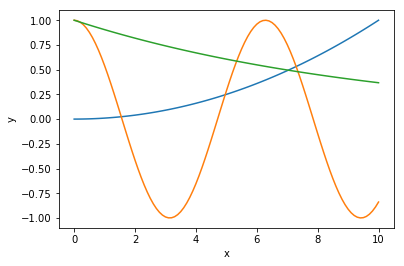

In [29]:
x = np.linspace(0, 10, 101)
y1 = x**2 / 100
y2 = np.cos(x)
y3 = np.exp(-x / 10)
plt.plot(x, y1)        # takto sa vyraba graf
plt.plot(x, y2)
plt.plot(x, y3)
plt.xlabel("x")
plt.ylabel("y")

In [31]:
M = np.array([[0, 1], [2, 3]])   # matica
print(M)

[[0 1]
 [2 3]]


In [44]:
4 * M           # vynasobime stvorkou vsetky prvky

array([[ 0,  4],
       [ 8, 12]])

In [25]:
M * M           # nasobenie po zlozkach

array([[0, 1],
       [4, 9]])

In [28]:
M @ M           # maticove nasobenie, kto to pozna

array([[ 2,  3],
       [ 6, 11]])

In [33]:
v = np.array([1, 3])
M @ v           # vektorove nasobenie

array([ 3, 11])

## [Úloha]

Vymyslite si vektor a maticu. Vygúglite, ako možno zistiť veľkosť matice a vektora, a ako možno zosumovať ich zložky.

In [47]:
M = np.arange(10).reshape(5, 2)
print(M)
len(M)
M.shape[1]
print(np.sum(M, 0))
print(np.sum(M, 1))

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[20 25]
[ 1  5  9 13 17]


Teraz vieme (približne!) všetko, čo treba na to, aby sme mohli začať robiť fyziku.

## Prvý príklad: voľný pád kameňa

Ak nechám padnúť kameň z výšky $h$, zo zákona zachovania viem vypočítať jeho výslednú rýchlosť na zemi. Treba na to rovnice pre kinetickú a potenciálnu energiu:

$$ KE = \frac 1 2 mv^2,$$
$$ PE = m g h.$$

Ak sa energia zachováva, viem, že výsledná rýchlosť $v = \sqrt{2gh}$ (ak neviete, odvoďte).

Neviem však, koľko času to potrvá, na to potrebujem trochu iný aparát, a to pohybovú rovnicu $F = ma$.

Postupovať budeme tak, že si určíme polohu a rýchlosť na začiatku. K rýchlosti budeme po kúskoch pričítavať zrýchlenie, a k polohe po kúskoch novú rýchlosť, až sa dostaneme zo stola na zem:
\begin{align}
a_{i+1} &= F(x_i, v_i) \,/\, m,\\
v_{i+1} &= v_i + a_i \Delta t,\\
x_{i+1} &= x_i + v_i \Delta t.
\end{align}

Výsledky budeme ukladať do vektora polohy a rýchlosti.

Tento postup sa volá *Eulerova metóda* a je najjednoduchší zo všetkých. V praxi sa však nepoužíva, medzičasom vymysleli sofistikovanejšie algoritmy. Najznámejšie sú Runge-Kutta 4 a hlavne Verletov algoritmus využívaný v obrovských atomových simuláciách:

\begin{align}
x_{i+1} &= 2 x_i - x_{i-1} + \frac{F(x_i)}{m} \Delta t^2.
\end{align}


In [7]:
dt = 0.01      # casovy krok
N = 1000         # pocet casovych krokov
g = -10         # gravitacne zrychlenie smerom nadol, preto minus
m = 1.0         # hmotnost
F = m * g       # tiazova sila, konstantna v case a priestore

v = np.zeros(N)
x = np.zeros(N)
t = np.arange(0, N * dt, dt)
v[0] = 0.0      # pociatocna rychlost
x[0] = 2.0      # pociatocna vyska
KE = np.zeros(N)
PE = np.zeros(N)

xt = np.array([x[0] + 0.5 * g * ti**2 for ti in t])

for i in range(N-1):
    a = F / m     # v tomto priklade tento riadok netreba, v dalsich ale ano!
    v[i+1] = v[i] + a * dt
    x[i+1] = x[i] + v[i] * dt
    #KE[i+1] = kin_energia(m, v[i+1])
    #PE[i+1] = pot_energia(m, g, x[i+1])    

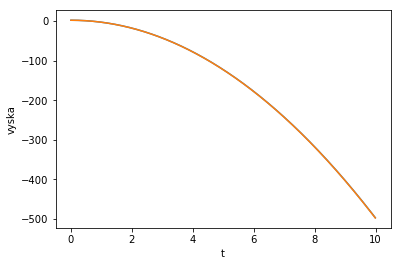

In [8]:
plt.plot(t, x)
plt.plot(t, xt)
plt.xlabel("t")
plt.ylabel("vyska")

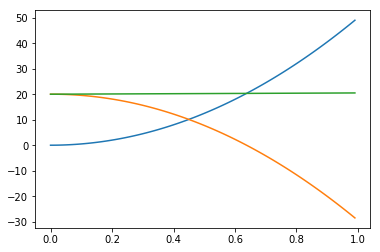

In [69]:
KE = 0.5 * m * v**2
PE = - m * g * x

plt.plot(t, KE)
plt.plot(t, PE)
plt.plot(t, KE + PE)

Kameň nám prepadol cez podlahu a letí o poschodie nižšie. To ale z hľadiska fyziky nevadí.

## [Úloha]
Napíšte funkciu pre kinetickú a potenciálnu energiu ich a tiež ich súčet pre každý časový krok. Uložte ich do vektora a vykreslite v grafe. Dostali ste očakávaný výsledok? 

## 2. príklad: kmitanie na pružine

Ak posadíme závažie na pružinu a vychýlime ho o $x$, sila, ktorou bude pružina na závažie pôsobiť, je $F(x) = -kx$. 

Podobne ako v predošlom príklade, zistite, ako sa takýto systém vyvíja v čase. Majte na pamäti, že tentokrát sa zrýchlenie mení v čase, a teda ho treba priebežne upravovať.

Spočítajte takisto kinetickú a potenciálnu energiu (vygúglite alebo uhádnite, aký tvar má potenciálna energia závažia na pružine) v každom čase a vykreslite.

Nastáva v čase nejaký nárast alebo pokles? Ak áno, pohrajte sa s veľkosťou kroku $\Delta t$. Toto je dôležitá veličina, ktorú sme podrobne neprediskutovali, avšak pre presnosť simulácie je kľúčová.

## 3. príklad: kmitanie na pružine v odporovom prostredí

Pod odporom si predstavme vzduch, vodu alebo med. Prečo by pružiny nemohli kmitať v mede? 

Okrem ťahovej sily od pružiny tu pôsobí sila odporová: $F = -\gamma v$.

Pohybová rovnica teda vyzerá nasledovne:

$$ m\ddot x(t) + \gamma \dot x(t) + k x(t) = 0.$$

Vyriešte rovnice pre rôzne hodnoty odporovej konštanty $\kappa$, od nuly po 5 alebo viac. Ako tuhosť vyberte $k=1$ a hmotnosť $m=1$. Aké kvalitatívne zmeny nastávajú pri kmitaní?

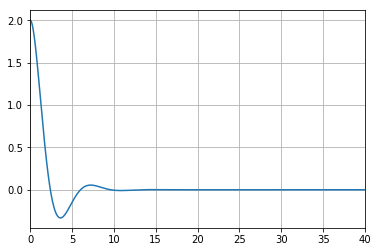

In [30]:
# Eulerova metoda
dt = 0.01
k = 1.0
m = 1.0
kappa = 1.0
N = 4000
x = np.zeros(N)
v = np.zeros(N)
t = np.arange(0, N, 1) * dt
x[0] = 2.0

for i in range(0, N-1):
    a = -k * x[i] - kappa * v[i] #* np.abs(v[i])
    v[i+1] = v[i] + a * dt
    x[i+1] = x[i] + v[i] * dt
    
plt.plot(t, x)
plt.xlim([0, N * dt])
plt.grid()

(0, 40.0)

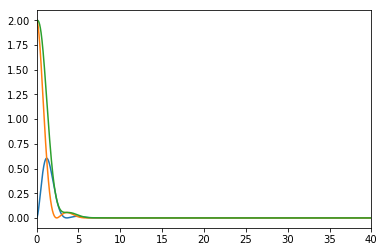

In [32]:
KE =  0.5 * m * v**2
PE = 0.5 * k * x**2

plt.plot(t, KE, t, PE, t, KE + PE)
plt.xlim([0, N * dt])

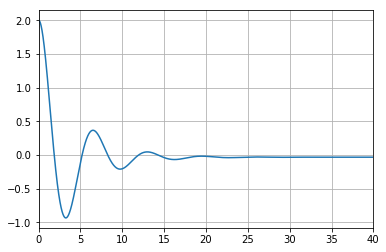

In [33]:
# Verletova metoda
dt = 0.01
k = 1.0
m = 1.0
gamma = 1.0
N = 4000
x = np.zeros(N)
v = np.zeros(N)
t = np.arange(0, N, 1) * dt
x[0] = 2.0
a1 = -k * x[0] - gamma * v[0]
x[1] = x[0] + v[0] * dt + a1 * dt**2 / 2.0  # treba prvy krok

for i in range(1, N-1):   
    a1 = -k * x[i] - gamma * v[i]
    x[i+1] = x[i] + v[i] * dt + a1 * dt**2 / 2.0
    a2 = -k * x[i+1] - gamma * vt**2
    v[i+1] = v[i] + (a1 + a2) * dt / 2.0
    
plt.plot(t, x)
plt.xlim([0, N * dt])
plt.grid()

### Analytické riešenie
$$ x(t) = 2 e^{-t/2} \bigg( \cos \frac{\sqrt 3} 2 t + \frac{\sqrt 3} 3 \sin \frac{\sqrt 3} 2 t \bigg)$$

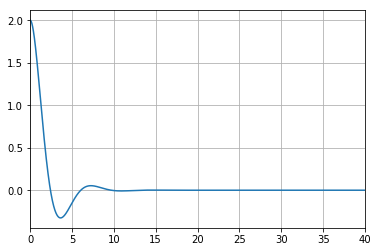

In [34]:
from math import exp, cos, sin, sqrt

def func(t):
    return 2 * exp(-0.5 * t) * (cos(sqrt(3)/2 * t) + sqrt(3)/3 * sin(sqrt(3)/2 * t))

x = np.array([func(ti) for ti in t])

plt.plot(t, x)
plt.xlim([0, N * dt])
plt.grid()

## 4. príklad pre makačov: šikmý vrh

Nasimulujte šikmý vrh, ideálne aj v odporovom prostredí.